In [2]:
import pandas as pd 
import folium 
import matplotlib
import matplotlib.pyplot as plt
import pylab
import numpy as np

#설치 안된거는 설치해주세요

In [3]:
# 파이그래프에서 한국어 나오게 하는 코드 

import matplotlib.font_manager as fm

for font in fm.fontManager.ttflist:
    if font.name in ['AppleGothic', 'Malgun Gothic']:
        plt.rcParams['font.family'] = font.name
        break

plt.rcParams['font.family']

['Malgun Gothic']

# EDA

## 경인, 경기지역 테이블 만들기

In [4]:
shelter = pd.read_csv('전국지진해일대피소표준데이터.csv', encoding = "CP949")

In [5]:
len(shelter)

9868

### 소재지도로명주소 null value 채우기 

In [6]:
shelter[shelter['소재지도로명주소'].isnull()]

,지진해일대피소명,지진해일대피소구분,지진해일대피소유형,지진해일대피소유형구분,소재지도로명주소,소재지지번주소,위도,경도,수용가능면적,최대수용인원수,...,해발높이,지진대피안내표지판수,긴급대피장소안내표지판수,지진대피로안내표지판수,관리기관명,관리기관전화번호,데이터기준일자,제공기관코드,제공기관명,Unnamed: 29
1103,강하생활체육공원,지진대피소,옥외대피소,공원,NaN,경기도 양평군 강하면 운심리 57번지,37.497379,127.413071,10000.0,12121.0,...,32.0,1.0,0.0,0.0,강하면,031-770-3089,2019-03-01,4170000,경기도 양평군,NaN
1107,단월레포츠공원,지진대피소,옥외대피소,공원,NaN,경기도 양평군 단월면 보룡리 산 11-1,37.544436,127.670154,10000.0,12121.0,...,112.0,1.0,0.0,0.0,단월면,031-770-3213,2019-03-01,4170000,경기도 양평군,NaN
1113,서동공원 서문주차장,지진대피소,옥외대피소,기타,NaN,충청남도 부여군 부여읍 동남리 172-1,36.271127,126.909818,13736.0,4000.0,...,NaN,0.0,0.0,0.0,충청남도 부여군청,041-830-2630,2018-10-01,4570000,충청남도 부여군,NaN
1159,솔터체육공원,지진대피소,옥외대피소,공원,NaN,경기도 김포시 마산동 642-1,37.640454,126.649226,193990.0,58785.0,...,NaN,NaN,NaN,NaN,김포시,031-980-2914,2019-09-10,4090000,경기도 김포시,NaN
1160,모담공원,지진대피소,옥외대피소,공원,NaN,경기도 김포시 운양동 1325-1,37.648470,126.689301,536255.0,162501.0,...,NaN,NaN,NaN,NaN,김포시,031-980-2914,2019-09-10,4090000,경기도 김포시,NaN
1161,조류생태공원,지진대피소,옥외대피소,공원,NaN,경기도 김포시 운양동 1246-1,37.657766,126.690011,565295.0,171301.0,...,NaN,NaN,NaN,NaN,김포시,031-980-2914,2019-09-10,4090000,경기도 김포시,NaN
1162,걸포중앙공원,지진대피소,옥외대피소,공원,NaN,경기도 김포시 걸포동 1553,37.638067,126.706824,134481.0,40752.0,...,NaN,NaN,NaN,NaN,김포시,031-980-2914,2019-09-10,4090000,경기도 김포시,NaN
1163,한강신도시 근린7호 공원,지진대피소,옥외대피소,공원,NaN,경기도 김포시 장기동 1888-15,37.641139,126.658917,99736.0,30223.0,...,NaN,NaN,NaN,NaN,김포시,031-980-2914,2019-09-10,4090000,경기도 김포시,NaN
1164,양곡 제4근린공원,지진대피소,옥외대피소,공원,NaN,경기도 김포시 양촌읍 양곡리 1331,37.653057,126.629209,42860.0,12988.0,...,NaN,NaN,NaN,NaN,김포시,031-980-2914,2019-09-10,4090000,경기도 김포시,NaN
1165,골드밸리 근린5호,지진대피소,옥외대피소,공원,NaN,경기도 김포시 양촌읍 학운리 3152,37.621077,126.629363,42308.0,12821.0,...,NaN,NaN,NaN,NaN,김포시,031-980-2914,2019-09-10,4090000,경기도 김포시,NaN


In [7]:
len(shelter[shelter['소재지도로명주소'].isnull()])

662

#### 소재지도로명주소, 소재지지번주소 둘다 빈 행이 없다는 것 확인

In [8]:
len(shelter[shelter['소재지도로명주소'].isnull()&shelter['소재지지번주소'].isnull()])

0

In [9]:
shelter[shelter['소재지도로명주소'].isnull()].head()

,지진해일대피소명,지진해일대피소구분,지진해일대피소유형,지진해일대피소유형구분,소재지도로명주소,소재지지번주소,위도,경도,수용가능면적,최대수용인원수,...,해발높이,지진대피안내표지판수,긴급대피장소안내표지판수,지진대피로안내표지판수,관리기관명,관리기관전화번호,데이터기준일자,제공기관코드,제공기관명,Unnamed: 29
1103,강하생활체육공원,지진대피소,옥외대피소,공원,NaN,경기도 양평군 강하면 운심리 57번지,37.497379,127.413071,10000.0,12121.0,...,32.0,1.0,0.0,0.0,강하면,031-770-3089,2019-03-01,4170000,경기도 양평군,NaN
1107,단월레포츠공원,지진대피소,옥외대피소,공원,NaN,경기도 양평군 단월면 보룡리 산 11-1,37.544436,127.670154,10000.0,12121.0,...,112.0,1.0,0.0,0.0,단월면,031-770-3213,2019-03-01,4170000,경기도 양평군,NaN
1113,서동공원 서문주차장,지진대피소,옥외대피소,기타,NaN,충청남도 부여군 부여읍 동남리 172-1,36.271127,126.909818,13736.0,4000.0,...,NaN,0.0,0.0,0.0,충청남도 부여군청,041-830-2630,2018-10-01,4570000,충청남도 부여군,NaN
1159,솔터체육공원,지진대피소,옥외대피소,공원,NaN,경기도 김포시 마산동 642-1,37.640454,126.649226,193990.0,58785.0,...,NaN,NaN,NaN,NaN,김포시,031-980-2914,2019-09-10,4090000,경기도 김포시,NaN
1160,모담공원,지진대피소,옥외대피소,공원,NaN,경기도 김포시 운양동 1325-1,37.648470,126.689301,536255.0,162501.0,...,NaN,NaN,NaN,NaN,김포시,031-980-2914,2019-09-10,4090000,경기도 김포시,NaN


#### 소재지지번주소로 부터 가져오기

In [10]:
shelter['소재지도로명주소'] = shelter['소재지도로명주소'].fillna(shelter['소재지지번주소'])

In [11]:
shelter[shelter['소재지도로명주소'].isnull()]

,지진해일대피소명,지진해일대피소구분,지진해일대피소유형,지진해일대피소유형구분,소재지도로명주소,소재지지번주소,위도,경도,수용가능면적,최대수용인원수,...,해발높이,지진대피안내표지판수,긴급대피장소안내표지판수,지진대피로안내표지판수,관리기관명,관리기관전화번호,데이터기준일자,제공기관코드,제공기관명,Unnamed: 29


In [12]:
shelter['소재지도로명주소'][1103]

'경기도 양평군 강하면 운심리 57번지'

### 서울 인천 경기도 데이터만 가져오기 위한 작업

#### area컬럼을 만들어 '소재지도로명주소' 띄어쓰기 전까지 잘라서 '서울특별시', '인천광역시', '경기도'로 담기

In [13]:
# 소재지도로명주소 string타입으로 변형 
shelter['소재지도로명주소'] = shelter['소재지도로명주소'].astype('str')

In [14]:
# 소재지도로명 띄어쓰기 기준으로 잘라 첫번째 덩어리만 area 컬럼에 저장
shelter['area'] = shelter['소재지도로명주소'].str.split(' ').str[0]

In [15]:
shelter.head()

,지진해일대피소명,지진해일대피소구분,지진해일대피소유형,지진해일대피소유형구분,소재지도로명주소,소재지지번주소,위도,경도,수용가능면적,최대수용인원수,...,지진대피안내표지판수,긴급대피장소안내표지판수,지진대피로안내표지판수,관리기관명,관리기관전화번호,데이터기준일자,제공기관코드,제공기관명,Unnamed: 29,area
0,내수2근린공원,지진대피소,옥외대피소,공원,서울특별시 종로구 경희궁4길,서울특별시 종로구 내수동 73-3,37.572387,126.971583,2192.0,664.0,...,NaN,NaN,NaN,종로구청,02-2148-2483,2018-08-14,3000000,서울특별시 종로구,NaN,서울특별시
1,대동세무고등학교,지진대피소,옥외대피소,운동장,서울특별시 종로구 계동길 84-10,NaN,37.581920,126.987930,2000.0,1000.0,...,NaN,NaN,NaN,종로구청,02-2148-2483,2018-08-14,3000000,서울특별시 종로구,NaN,서울특별시
2,대신고등학교,지진대피소,옥외대피소,운동장,서울특별시 종로구 사직로 9,NaN,37.572915,126.961601,4663.0,1413.0,...,NaN,NaN,NaN,종로구청,02-2148-2483,2018-08-14,3000000,서울특별시 종로구,NaN,서울특별시
3,덕성여자고등학교,지진대피소,옥외대피소,운동장,서울특별시 종로구 율곡로3길 50,NaN,37.577918,126.982867,4180.0,1260.0,...,NaN,NaN,NaN,종로구청,02-2148-2483,2018-08-14,3000000,서울특별시 종로구,NaN,서울특별시
4,덕성여자중학교,지진대피소,옥외대피소,운동장,서울특별시 종로구 율곡로3길 49,NaN,37.577945,126.981778,6701.0,2030.0,...,NaN,NaN,NaN,종로구청,02-2148-2483,2018-08-14,3000000,서울특별시 종로구,NaN,서울특별시


In [16]:
shelter.area.unique()

array(['서울특별시', '대전광역시', '충청북도', '경기도', '인천광역시', '경상남도', '강원도', '전라북도',
       '광주광역시', '경상북도', '충청남도', '부산광역시', '대구광역시', '전라남도', '울산광역시',
       '제주특별자치도', '세종특별자치시'], dtype=object)

#### 경인, 경기지방으로 shelter_GG 테이블 만들기

In [17]:
shelter_GG = shelter[(shelter['area']=='서울특별시')|(shelter['area']=='인천광역시')|(shelter['area']=='경기도')]

In [18]:
shelter_GG.area.unique()

array(['서울특별시', '경기도', '인천광역시'], dtype=object)

### shelter_GG(서, 인, 경기만 모아논 테이블) 분석 

#### null value가 있는 컬럼 찾기

In [19]:
len(shelter_GG)

3155

In [100]:
# 컬럼별 null값 찾기
data = shelter_GG.isnull().sum()
pd.DataFrame(data)

,0
지진해일대피소명,0
지진해일대피소구분,0
지진해일대피소유형,0
지진해일대피소유형구분,0
소재지도로명주소,0
소재지지번주소,2063
위도,71
경도,70
수용가능면적,0
최대수용인원수,0


### null value가 있는 컬럼 
- 위도
    - 채울 수 있음 
- 경도
    - 채울 수 있음 
- 부대편의시설: 불가
- 주민대피지구내거주인수
    - 주변지역 인구수 통계로 대체 가능할 듯
- 주민대피지구내가구수
    - 주변지역 인구수 통계로 대체 가능할 듯
- 주민대피지구내재해약자수
    - 주변지역 인구수 통계로 대체 가능할 듯
- 내진설계등급
    - 불가
- 해안선이격거리
    - 불가
- 해발높이
    - 불가
- 지진대피안내표지판수
    - 불가
- 지진대피로안내표지판수
    - 불가
- 관리기관전화번호: 의미 없음

#### 위도, 경도 null value 채우기

In [22]:
nulls = shelter_GG[shelter_GG['위도'].isnull()]

kakao api 사용해서 위도, 경도 결측치 채우기 

In [23]:
# from geocoder import geocode

In [24]:
# lats = []
# lngs = []

# for i, index in enumerate(nulls.index):
#     print(i + 1, '-', index)
#     lat, lng = geocode(nulls['소재지도로명주소'][index])
#     lats.append(lat)
#     lngs.append(lng)

# nulls = nulls.assign(lat=lats, lng=lngs)

# nulls.head()



In [25]:
# nulls.to_csv('nulls.csv')

api 사용 쿼타때문에 csv로 저장한 후 사용

kakao api 돌렸을 때 못찾은 위도 경도 찾기 위해 LocationIQ 돌리기 

In [26]:
# import os 
# import requests

In [27]:
# LOCATIONIQ_TOKEN = os.environ['LOCATIONIQ_TOKEN']

In [28]:
# def gc(address):
#     url = 'https://us1.locationiq.com/v1/search.php'
#     payload = {
#         'key': LOCATIONIQ_TOKEN,
#         'q': address,
#         'format': 'json'
#     }
#     response = requests.get(url, params=payload)
#     results = response.json()
#     if 'error' in results:
#         return None, None
#     coordinates = results[0]
#     return coordinates['lat'], coordinates['lon']

In [29]:
# lats = []
# lngs = []

# for i, index in enumerate(nulls.index):
#     print(i + 1, '-', index)
#     lat, lng = gc(nulls['소재지도로명주소'][index])
#     lats.append(lat or 0)
#     lngs.append(lng or 0)

# nulls = nulls.assign(위=lats, 경=lngs)

# nulls.head()

```
두 개 다 돌렸는데도 못찾은 위도, 경도는 손수 노가다로 찾아서 작성
손수 수정하다가 필요없는 컬럼은 삭제했음 (코드로 대체 가능)
```

In [30]:
nulls = pd.read_csv('nulls.csv')

In [31]:
nulls.head()

,지진해일대피소명,위,경
0,계양교통공원,37.108100,129.003000
1,해뜰어린이공원,37.655230,126.625070
2,도림동 유수지,37.504137,126.895320
3,안양천 영롱이 인라인마당,37.512453,126.912734
4,안양천 억새구장 축구장,37.512453,126.912734


In [32]:
shelter_G = shelter_GG.merge(nulls, how='left', on='지진해일대피소명')

In [33]:
len(shelter_G) #merge 잘 됐는지 확인 완료

3155

In [34]:
 #nulls 테이블에 있던 위도 경도 shelter_GG 테이블 위도 경도로 옮기기
shelter_G['위도'] = shelter_G['위도'].fillna(shelter_G['위'])

In [35]:
shelter_G['경도'] = shelter_G['경도'].fillna(shelter_G['경'])

In [36]:
pd.DataFrame(shelter_G.isnull().sum()) #위도, 경도 결측치 다 채운 것 확인완료 

,0
지진해일대피소명,0
지진해일대피소구분,0
지진해일대피소유형,0
지진해일대피소유형구분,0
소재지도로명주소,0
소재지지번주소,2063
위도,0
경도,0
수용가능면적,0
최대수용인원수,0


### 내진설계 분석

In [37]:
for_seismic = shelter_G[shelter_G['지진해일대피소유형']=='실내대피소']

# 실내 대피소만 내진설계가 가능하기 때문에 실내 대피소만 

In [38]:
seismic_design = len(for_seismic[for_seismic['내진적용여부']=='적용'])/len(for_seismic)*100
print('경인, 경기지역 내진설계 비율 =', seismic_design, '%')

경인, 경기지역 내진설계 비율 = 78.73376623376623 %


Text(0, 0.5, '')

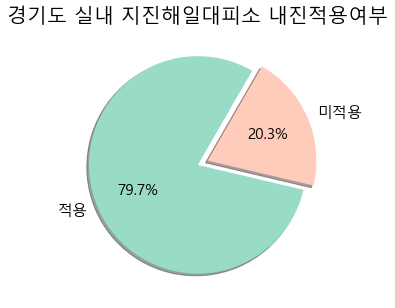

In [39]:
labels=['적용', '미적용']   #항상 파이그래프 보면서 labe순서 제대로 설정했는지 확인 
shelter_G['내진적용여부'].value_counts().plot.pie(labels = labels
                    ,colors= ['#98DBC6', '#FFCCBB'] #색깔 지정 (색깔 코드 인터넷 검색)
                    ,startangle = 60                #시작 각도 설정
                    ,shadow = True                  #그림자 생성
                    ,autopct = '%1.1f%%'            # 퍼센테이지 소숫점 설정
                    ,explode = (0,0.1)              # 한 파트 톡 튀어 나오게 만들기 (꼭 파트의 수와 동일해야함 안그럼 오류 EG)4개로 구분되면 (0, 0, 0, 0.1)로 기재)
                    ,figsize=(5, 5)                 # 그래프 사이즈 설정 
                    ,fontsize = 15)                 # 글씨 크기 설정
plt.title('경기도 실내 지진해일대피소 내진적용여부', fontsize=20)   #제목명, 제목 사이즈 설정
pylab.ylabel('')    # y축 설명 없애기 

### 지진해일 대피소 구분 분석

In [40]:
len(shelter_G[shelter_G['지진해일대피소구분']=='지진대피소'])

3122

Text(0, 0.5, '')

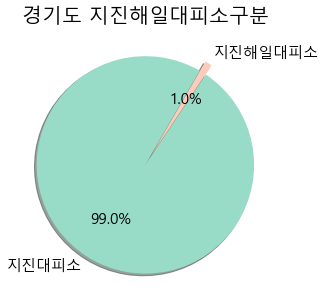

In [41]:
labels=['지진대피소', '지진해일대피소']
shelter_G['지진해일대피소구분'].value_counts().plot.pie(labels = labels
                    ,colors= ['#98DBC6', '#FFCCBB']
                    ,startangle = 60
                    ,shadow = True
                    ,autopct = '%1.1f%%'
                    ,explode = (0,0.1) 
                    ,figsize=(5, 5)
                    ,fontsize = 15)
plt.title('경기도 지진해일대피소구분', fontsize=20)
pylab.ylabel('')

### 지진해일대피소유형 분석

In [42]:
shelter_GG['지진해일대피소유형'].unique()

array(['옥외대피소', '실내대피소'], dtype=object)

Text(0, 0.5, '')

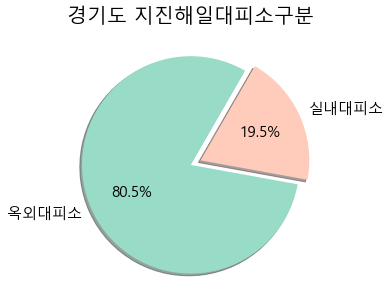

In [43]:
labels=['옥외대피소', '실내대피소']
shelter_GG['지진해일대피소유형'].value_counts().plot.pie(labels = labels
                    ,colors= ['#98DBC6', '#FFCCBB']
                    ,startangle = 60
                    ,shadow = True
                    ,autopct = '%1.1f%%'
                    ,explode = (0,0.1) 
                    ,figsize=(5, 5)
                    ,fontsize = 15)
plt.title('경기도 지진해일대피소구분', fontsize=20)
pylab.ylabel('')

### 지진해일대피소유형구분 분석

In [44]:
shelter_G['지진해일대피소유형구분'].unique()

array(['공원', '운동장', '학교', '기타', '체육관'], dtype=object)

Text(0, 0.5, '')

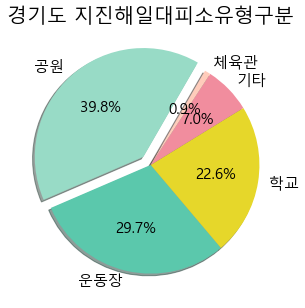

In [45]:
labels=['공원', '운동장', '학교', '기타', '체육관']
shelter_G['지진해일대피소유형구분'].value_counts().plot.pie(labels = labels
                    ,colors= ['#98DBC6','#5BC8AC','#E6D72A','#F18D9E', '#FFCCBB']
                    ,startangle = 60
                    ,shadow = True
                    ,autopct = '%1.1f%%'
                    ,explode = (0.1,0,0,0,0) 
                    ,figsize=(5, 5)
                    ,fontsize = 15)
plt.title('경기도 지진해일대피소유형구분', fontsize=20)
pylab.ylabel('')

### 지진해일대피소운영상태 분석

In [46]:
shelter_G['지진해일대피소운영상태'].unique()

array(['Y', 'N'], dtype=object)

Text(0, 0.5, '')

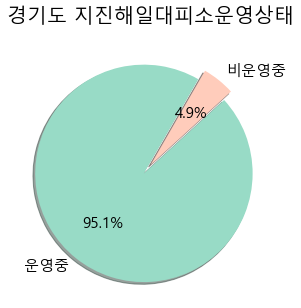

In [47]:
labels=['운영중', '비운영중']
shelter_G['지진해일대피소운영상태'].value_counts().plot.pie(labels = labels
                    ,colors= ['#98DBC6', '#FFCCBB']
                    ,startangle = 60
                    ,shadow = True
                    ,autopct = '%1.1f%%'
                    ,explode = (0.1,0) 
                    ,figsize=(5, 5)
                    ,fontsize = 15)
plt.title('경기도 지진해일대피소운영상태', fontsize=20)
pylab.ylabel('')

### 경기도 지역 분석

In [48]:
shelter_G['area'].unique()

array(['서울특별시', '경기도', '인천광역시'], dtype=object)

In [49]:
shelter_G[shelter_G['area']=='인천광역시']

,지진해일대피소명,지진해일대피소구분,지진해일대피소유형,지진해일대피소유형구분,소재지도로명주소,소재지지번주소,위도,경도,수용가능면적,최대수용인원수,...,지진대피로안내표지판수,관리기관명,관리기관전화번호,데이터기준일자,제공기관코드,제공기관명,Unnamed: 29,area,위,경
89,만석초등학교 운동장,지진대피소,옥외대피소,운동장,인천광역시 동구 제물량로 412(화수동),인천광역시 동구 화수동 11-6,37.484221,126.628016,2902.0,3517.0,...,NaN,인천광역시 동구,032-770-6562,2019-07-31,3500000,인천광역시 동구,NaN,인천광역시,NaN,NaN
90,화도진중학교 운동장,지진대피소,옥외대피소,운동장,인천광역시 동구 화수로 64(화수동),인천광역시 동구 화수동 2-5,37.484718,126.632138,2025.0,2454.0,...,NaN,인천광역시 동구,032-770-6562,2019-07-31,3500000,인천광역시 동구,NaN,인천광역시,NaN,NaN
91,송현초등학교 운동장,지진대피소,옥외대피소,운동장,인천광역시 동구 송화로 45(송현동),인천광역시 동구 송현동 66-21,37.481962,126.633658,413.0,500.0,...,NaN,인천광역시 동구,032-770-6562,2019-07-31,3500000,인천광역시 동구,NaN,인천광역시,NaN,NaN
92,영화관광경영고등학교 운동장,지진대피소,옥외대피소,운동장,인천광역시 동구 우각로 39(창영동),인천광역시 동구 창영동 36,37.471192,126.640423,2000.0,2424.0,...,NaN,인천광역시 동구,032-770-6562,2019-07-31,3500000,인천광역시 동구,NaN,인천광역시,NaN,NaN
93,창영초등학교 운동장,지진대피소,옥외대피소,운동장,인천광역시 동구 우각로 19(창영동),인천광역시 동구 창영동 30,37.471155,126.638868,1417.0,1717.0,...,NaN,인천광역시 동구,032-770-6562,2019-07-31,3500000,인천광역시 동구,NaN,인천광역시,NaN,NaN
94,인천산업정보학교 운동장,지진대피소,옥외대피소,운동장,인천광역시 동구 금창로 31(금곡동),인천광역시 동구 금곡동 45-1,37.471942,126.641355,3602.0,4366.0,...,NaN,인천광역시 동구,032-770-6562,2019-07-31,3500000,인천광역시 동구,NaN,인천광역시,NaN,NaN
95,동명초등학교 운동장,지진대피소,옥외대피소,운동장,인천광역시 동구 송림로70번길 10(송림동),인천광역시 동구 송림동 97-1,37.474150,126.642175,2352.0,2850.0,...,NaN,인천광역시 동구,032-770-6562,2019-07-31,3500000,인천광역시 동구,NaN,인천광역시,NaN,NaN
96,동산고등학교 운동장,지진대피소,옥외대피소,운동장,인천광역시 동구 동산로 58(송림동),인천광역시 동구 송림동 114,37.473155,126.648670,5000.0,6060.0,...,NaN,인천광역시 동구,032-770-6562,2019-07-31,3500000,인천광역시 동구,NaN,인천광역시,NaN,NaN
97,서림초등학교 운동장,지진대피소,옥외대피소,운동장,인천광역시 동구 금곡로 105(송림동),인천광역시 동구 송림동 61-11,37.475462,126.646527,1650.0,2000.0,...,NaN,인천광역시 동구,032-770-6562,2019-07-31,3500000,인천광역시 동구,NaN,인천광역시,NaN,NaN
98,서흥초등학교 운동장,지진대피소,옥외대피소,운동장,인천광역시 동구 샛골로 189(송림동),인천광역시 동구 송림동 34-1,37.478986,126.644600,1972.0,2390.0,...,NaN,인천광역시 동구,032-770-6562,2019-07-31,3500000,인천광역시 동구,NaN,인천광역시,NaN,NaN


Text(0, 0.5, '')

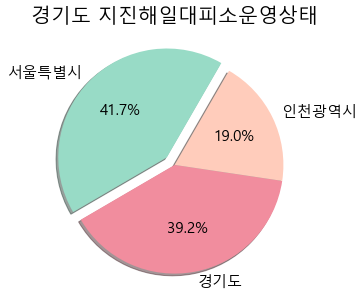

In [50]:
labels=['서울특별시', '경기도', '인천광역시']
shelter_G['area'].value_counts().plot.pie(labels = labels
                    ,colors= ['#98DBC6','#F18D9E', '#FFCCBB']
                    ,startangle = 60
                    ,shadow = True
                    ,autopct = '%1.1f%%' 
                    ,explode = (0.1,0, 0) 
                    ,figsize=(5, 5)
                    ,fontsize = 15)
plt.title('경기도 지진해일대피소운영상태', fontsize=20)
pylab.ylabel('')

## 서울 지도

In [51]:
shelter_G.sample(30)

,지진해일대피소명,지진해일대피소구분,지진해일대피소유형,지진해일대피소유형구분,소재지도로명주소,소재지지번주소,위도,경도,수용가능면적,최대수용인원수,...,지진대피로안내표지판수,관리기관명,관리기관전화번호,데이터기준일자,제공기관코드,제공기관명,Unnamed: 29,area,위,경
1864,신동중학교,지진대피소,실내대피소,학교,서울특별시 서초구 나루터로 27,NaN,37.516915,127.012918,1095.0,300.0,...,NaN,서초구청,NaN,2019-06-03,3210000,서울특별시 서초구,NaN,서울특별시,NaN,NaN
771,고읍도서관,지진대피소,실내대피소,기타,경기도 양주시 고읍남로 205,경기도 양주시 광사동 659번지,37.792871,127.082730,674.0,204.0,...,NaN,양주시청,NaN,2019-04-18,5590000,경기도 양주시,NaN,경기도,NaN,NaN
889,송파중학교 운동장,지진대피소,옥외대피소,운동장,서울특별시 송파구 동남로 203,NaN,37.496012,127.129772,12295.0,3726.0,...,NaN,송파구청 재난안전과,02-2147-3106,2019-05-31,3230000,서울특별시 송파구,NaN,서울특별시,NaN,NaN
2456,세명초등학교,지진해일대피소,실내대피소,학교,서울특별시 강남구 자곡로55,NaN,37.468857,127.091076,13416.0,5160.0,...,NaN,서울특별시 강남구청,NaN,2019-03-26,3220000,서울특별시 강남구,NaN,서울특별시,NaN,NaN
1794,상문고등학교,지진대피소,옥외대피소,학교,서울특별시 서초구 명달로 45,NaN,37.479755,127.003916,10800.0,3272.0,...,NaN,서초구청,NaN,2019-06-03,3210000,서울특별시 서초구,NaN,서울특별시,NaN,NaN
1261,군인아파트어린이공원,지진대피소,옥외대피소,공원,서울특별시 관악구 남현동 602-143,서울특별시 관악구 남현동 602-143,37.471839,126.978946,926.0,280.0,...,NaN,서울특별시 관악구청,NaN,2019-05-30,3200000,서울특별시 관악구,NaN,서울특별시,NaN,NaN
2295,서울예술대학교 운동장,지진대피소,옥외대피소,학교,경기도 안산시 단원구 예술대학로 171,경기도 안산시 단원구 고잔동 640번지,37.334032,126.836241,6059.0,7344.0,...,NaN,안산시청,031-481-2724,2019-07-05,3930000,경기도 안산시,NaN,경기도,NaN,NaN
1054,화곡초등학교,지진대피소,실내대피소,학교,서울특별시 강서구 초록마을로 28(화곡본동),NaN,37.543670,126.846471,3039.0,920.0,...,NaN,서울특별시 강서구청,02-2600-6293,2019-06-17,3150000,서울특별시 강서구,NaN,서울특별시,NaN,NaN
2695,신현고등학교,지진대피소,실내대피소,학교,인천광역시 서구 염곡로 399 (신현동),NaN,37.520237,126.667907,889.0,269.0,...,NaN,인천광역시 서구청,032-560-4703,2018-08-13,3560000,인천광역시 서구,NaN,인천광역시,NaN,NaN
1350,필동경로당,지진대피소,옥외대피소,기타,서울특별시 중구 필동로 11 (필동2가),NaN,37.560516,126.996252,571.0,53.0,...,NaN,서울특별시 중구청,NaN,2018-12-04,3010000,서울특별시 중구,NaN,서울특별시,NaN,NaN


In [52]:
shelter_seoul = shelter_G[shelter_G['area']=='서울특별시']

In [53]:
map = folium.Map(location=[35.9078, 127.7669], zoom_start = 6, tiles ='Mapbox bright')

In [54]:
fg = folium.FeatureGroup(name = '서울지진해일대피소')

In [55]:
for lat, lon, name in zip(shelter_seoul['위도'], shelter_seoul['경도'], shelter_seoul['지진해일대피소명']):
    fg.add_child(folium.Marker(location=[lat, lon], popup=(folium.Popup(name)), icon=folium.Icon(icon = 'cloud', color= 'blue', icon_color = 'white')))

In [56]:
map.add_child(fg)

In [57]:
map.save(outfile='서울.html')

## 인천광역시

In [58]:
shelter_incheon = shelter_G[shelter_G['area']=='인천광역시']
map = folium.Map(location=[35.9078, 127.7669], zoom_start = 6, tiles ='Mapbox bright')
fg = folium.FeatureGroup(name = '인천지진해일대피소')
for lat, lon, name in zip(shelter_incheon['위도'], shelter_incheon['경도'], shelter_incheon['지진해일대피소명']):
    fg.add_child(folium.Marker(location=[lat, lon], popup=(folium.Popup(name)), icon=folium.Icon(icon = 'cloud', color= 'blue', icon_color = 'white')))
map.add_child(fg) 
map.save(outfile='인천.html')

## 경기도

In [59]:
shelter_ggi = shelter_G[shelter_G['area']=='경기도']
map = folium.Map(location=[35.9078, 127.7669], zoom_start = 6, tiles ='Mapbox bright')
fg = folium.FeatureGroup(name = '경기지진해일대피소')
for lat, lon, name in zip(shelter_ggi['위도'], shelter_ggi['경도'], shelter_ggi['지진해일대피소명']):
    fg.add_child(folium.Marker(location=[lat, lon], popup=(folium.Popup(name)), icon=folium.Icon(icon = 'cloud', color= 'blue', icon_color = 'white')))
map.add_child(fg) 
map.save(outfile='경기.html')

### 인구조사와 join

In [60]:
ppl = pd.read_csv('population.csv', encoding = "CP949")

# http://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1B040A3

In [61]:
ppl.head()

,행정구역(시군구)별,2019. 09
0,행정구역(시군구)별,총인구수 (명)
1,서울특별시,9740398
2,종로구,151767
3,중구,126409
4,용산구,228830


In [62]:
len(ppl)

87

필요없는 rows 제거 (서울특별시, 인천광역시, 경기도 -> 세부 행정구역의 인구수의 합이기에 불필요)

In [63]:
ppl[(ppl['행정구역(시군구)별']=='행정구역(시군구)별')|(ppl['행정구역(시군구)별']=='서울특별시')|(ppl['행정구역(시군구)별']=='인천광역시')|(ppl['행정구역(시군구)별']=='경기도')]

,행정구역(시군구)별,2019. 09
0,행정구역(시군구)별,총인구수 (명)
1,서울특별시,9740398
27,인천광역시,2956804
38,경기도,13207219


In [65]:
ppl = ppl.drop(ppl.index[0])   #첫번째 열 제거 
ppl = ppl.drop(ppl.index[0])   #첫번째 열 제거한 테이블의 첫번쨰 열 제거 (원래 테이블의 [1]인덱스)
ppl = ppl.drop(ppl.index[25])  #열 두개 제거한 테이블의 25번째 열 제거 (원래 테이블의 [27]인덱스)
ppl = ppl.drop(ppl.index[35])  #열 두개 제거한 테이블의 35번째 열 제거 (원래 테이블의 [38]인덱스)
ppl

,행정구역(시군구)별,2019. 09
2,종로구,151767
3,중구,126409
4,용산구,228830
5,성동구,303158
6,광진구,352692
7,동대문구,346551
8,중랑구,398812
9,성북구,441590
10,강북구,314090
11,도봉구,335280


### 서울특별시 중구, 인천광역시 중구가 있어서 겹치지 않게 ppl 지역명 앞에 서울특별시, 인천광역시, 경기도 붙여주기
- 서울, 인천, 경기로 나눠서 앞에 지역명 붙여주고 다시 하나의 dataframe으로 만들기 

In [66]:
# 분석 쉽도로 컬럼명 변경 
ppl = ppl.rename(columns={'행정구역(시군구)별': 'sigungu', '2019. 09': 'nop'}) #nop: number of people

In [68]:
#.iloc으로 [25번째 열까지, 모든 컬럼] 잘라내서 '서울' 테이블로 지정 
서울 = ppl.iloc[:25, :]

In [69]:
# 서울 구 이름 앞에 서울특별시 붙여넣기
서울['sigungu'] = '서울특별시' + ' ' + 서울.sigungu.str[0:] #future warning 무시 -> 해결방법을 찾아야하지만....ㅎ 

c:\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [70]:
서울

,sigungu,nop
2,서울특별시 종로구,151767
3,서울특별시 중구,126409
4,서울특별시 용산구,228830
5,서울특별시 성동구,303158
6,서울특별시 광진구,352692
7,서울특별시 동대문구,346551
8,서울특별시 중랑구,398812
9,서울특별시 성북구,441590
10,서울특별시 강북구,314090
11,서울특별시 도봉구,335280


In [71]:
인천 = ppl.iloc[25:35]

In [72]:
인천['sigungu'] = '인천광역시' + ' ' + 인천.sigungu.str[0:]

c:\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [73]:
인천

,sigungu,nop
28,인천광역시 중구,132052
29,인천광역시 동구,64718
30,인천광역시 미추홀구,410998
31,인천광역시 연수구,362254
32,인천광역시 남동구,533560
33,인천광역시 부평구,514856
34,인천광역시 계양구,305394
35,인천광역시 서구,543108
36,인천광역시 강화군,69138
37,인천광역시 옹진군,20726


In [74]:
경기도 = ppl.iloc[35:]

In [75]:
경기도['sigungu'] = '경기도' + ' ' + 경기도.sigungu.str[0:]

c:\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [76]:
ppl = pd.concat([서울, 인천, 경기도], ignore_index=True)

In [77]:
ppl.sample(10)

,sigungu,nop
36,경기도 장안구,279819
68,경기도 처인구,255900
31,인천광역시 계양구,305394
3,서울특별시 성동구,303158
11,서울특별시 은평구,481663
6,서울특별시 중랑구,398812
82,경기도 양평군,117010
72,경기도 이천시,216225
1,서울특별시 중구,126409
78,경기도 포천시,148800


In [78]:
len(ppl)

83

In [102]:
# 제공기관명이 시이름 + 구이름 으로 되어 있어서 이 컬럼을 기준으로 join 할 예정
shelter_G.제공기관명.unique()

array(['서울특별시 종로구', '경기도 시흥시', '인천광역시 동구', '서울특별시 중랑구', '인천광역시 계양구',
       '서울특별시 동작구', '경기도 가평군', '경기도 양평군', '경기도 김포시', '경기도 오산시',
       '경기도 의정부시', '인천광역시 부평구', '서울특별시 영등포구', '인천광역시 옹진군', '경기도 양주시',
       '경기도 구리시', '경기도 과천시', '서울특별시 송파구', '서울특별시 강서구', '서울특별시 은평구',
       '경기도 의왕시', '인천광역시 중구', '서울특별시 관악구', '경기도 동두천시', '서울특별시 중구',
       '경기도 포천시', '서울특별시 금천구', '경기도 남양주시', '경기도 고양시', '서울특별시 광진구',
       '서울특별시 서대문구', '경기도 화성시', '서울특별시 서초구', '경기도 군포시', '경기도 성남시',
       '경기도 부천시', '인천광역시 연수구', '경기도 여주시', '서울특별시 노원구', '경기도 안성시',
       '경기도 파주시', '경기도 안산시', '경기도 이천시', '서울특별시 강남구', '경기도 평택시',
       '인천광역시 서구', '서울특별시 양천구', '경기도 수원시', '경기도 광주시', '경기도 하남시',
       '인천광역시 남동구', '인천광역시 미추홀구'], dtype=object)

In [103]:
# 인구테이블과 join하기 위해 필요한 두개 컬럼만 shelter_ppl이라는 테이블로 저장
shelter_ppl = shelter_G[['최대수용인원수', '제공기관명']]

In [82]:
# 제공기관명으로 groupby해서 그 지역 내 모든 대피소 최대수용인원수 더하기
shelter_capacity= pd.DataFrame(shelter_ppl.groupby('제공기관명')['최대수용인원수'].sum())

In [83]:
shelter_capacity

,최대수용인원수
제공기관명,
경기도 가평군,24315.0
경기도 고양시,125398.0
경기도 과천시,86889.0
경기도 광주시,232907.0
경기도 구리시,4533.0
경기도 군포시,192551.0
경기도 김포시,555246.0
경기도 남양주시,20926.0
경기도 동두천시,29709.0


In [84]:
# join 하기
shelter_capacity = shelter_capacity.merge(ppl, how='left', left_on=['제공기관명'], right_on=['sigungu'])

In [85]:
shelter_capacity.columns

Index(['최대수용인원수', 'sigungu', 'nop'], dtype='object')

In [86]:
shelter_capacity.sample(10)

,최대수용인원수,sigungu,nop
19,243768.0,경기도 의왕시,159911
43,425611.0,인천광역시 계양구,305394
13,738798.0,경기도 안산시,654668
16,256268.0,경기도 양평군,117010
20,322569.0,경기도 의정부시,451846
27,364545.0,서울특별시 강남구,544028
10,12241.0,경기도 성남시,944741
50,12681.0,인천광역시 옹진군,20726
33,372244.0,서울특별시 동작구,397618
5,192551.0,경기도 군포시,274667


In [87]:
# 분석 용이하게 하기 위해 컬럼명 변경 
shelter_capacity.rename(columns={'최대수용인원수':'max'}, inplace=True)

In [88]:
len(shelter_capacity)

52

In [89]:
# max 컬럼이 float64이기때문에 정확한 비교를 위해 타입 변경
shelter_capacity['nop'] = shelter_capacity['nop'].astype('float64')

In [90]:
shelter_capacity[shelter_capacity['nop']>shelter_capacity['max']]

,max,sigungu,nop
0,24315.0,경기도 가평군,62743.0
1,125398.0,경기도 고양시,1059340.0
3,232907.0,경기도 광주시,370411.0
4,4533.0,경기도 구리시,199595.0
5,192551.0,경기도 군포시,274667.0
7,20926.0,경기도 남양주시,699326.0
8,29709.0,경기도 동두천시,94912.0
9,25845.0,경기도 부천시,833218.0
10,12241.0,경기도 성남시,944741.0
11,475265.0,경기도 수원시,1196074.0


In [91]:
# 두 컬럼의 차를 diff 컬럼에 저장
shelter_capacity['diff'] = shelter_capacity['max']-shelter_capacity['nop']

In [92]:
shelter_capacity['diff'].max()

1175461.0

In [93]:
shelter_capacity['diff'].min()

-933942.0

In [94]:
shelter_capacity[shelter_capacity['diff']==shelter_capacity['diff'].max()]

,max,sigungu,nop,diff
51,1307513.0,인천광역시 중구,132052.0,1175461.0


In [95]:
shelter_capacity[shelter_capacity['sigungu'] =='인천광역시 중구']

,max,sigungu,nop,diff
51,1307513.0,인천광역시 중구,132052.0,1175461.0


In [96]:
# 값이 마이너스면 불충분, 플러스면 충분으로 지정
shelter_capacity['capacity'] = shelter_capacity['diff'].apply(lambda x: '불충분' if x<0 else '충분' )

In [97]:
len(shelter_capacity[shelter_capacity['nop']>shelter_capacity['max']])

38

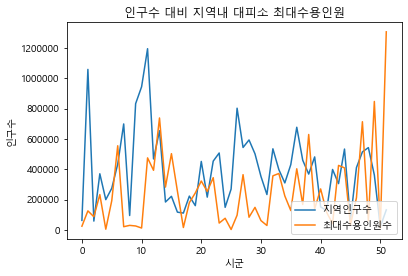

In [98]:
line_chart1 = plt.plot(shelter_capacity['nop'])
line_chart2 = plt.plot(shelter_capacity['max'])
plt.title('인구수 대비 지역내 대피소 최대수용인원')
plt.xlabel('시군')
plt.ylabel('인구수')
plt.legend(['지역인구수', '최대수용인원수'], loc = 4)
plt.show()

Text(0, 0.5, '')

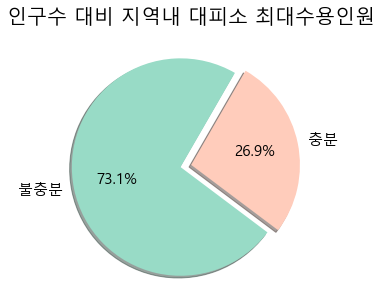

In [99]:
labels=['불충분', '충분']
shelter_capacity['capacity'].value_counts().plot.pie(labels = labels
                    ,colors= ['#98DBC6', '#FFCCBB']
                    ,startangle = 60
                    ,shadow = True
                    ,autopct = '%1.1f%%'
                    ,explode = (0.1,0) 
                    ,figsize=(5, 5)
                    ,fontsize = 15)
plt.title('인구수 대비 지역내 대피소 최대수용인원', fontsize=20)
pylab.ylabel('')